#Problem Statement
Vector-borne diseases, transmitted by organisms such as mosquitoes and ticks, are a major public health concern worldwide. These diseases, including malaria, dengue, and Zika, lead to significant morbidity and mortality, particularly in tropical and subtropical regions. The challenge in combating these diseases lies in the early and accurate diagnosis, as symptoms often overlap with other illnesses, leading to misdiagnosis and delayed treatment. Late and incorrect diagnosis of these diseases further exacerbates the problem, resulting in ineffective interventions and poorer patient outcomes. Despite advances in medical research, there remains a critical need for precise and reliable diagnostic tools to improve patient care and disease management.

#Citation
The project will use vector borne disease datasets from the following source:
Kaggle. "Playground Series - Season 3, Episode 13." Accessed August 2, 2024. https://www.kaggle.com/competitions/playground-series-s3e13/data.
Description: Categorical dataset for 11 vector-borne diseases with associated symptoms, including Chikungunya, Dengue, Zika, Yellow Fever, Rift Valley Fever, West Nile Fever, Malaria, Tungiasis, Japanese Encephalitis, Plague, and Lyme Disease

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import roc_auc_score, roc_curve, log_loss
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem
from scipy.cluster.hierarchy import dendrogram, ward


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
pd.options.mode.chained_assignment = None

#sns.set_theme(style = 'white', palette = 'viridis')
#pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)

In [18]:
# load dataset
path = '/content/train.csv'
df = pd.read_csv(path)
df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [19]:
df = df.drop(columns=['id'])
df.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [20]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sudden_fever           707 non-null    float64
 1   headache               707 non-null    float64
 2   mouth_bleed            707 non-null    float64
 3   nose_bleed             707 non-null    float64
 4   muscle_pain            707 non-null    float64
 5   joint_pain             707 non-null    float64
 6   vomiting               707 non-null    float64
 7   rash                   707 non-null    float64
 8   diarrhea               707 non-null    float64
 9   hypotension            707 non-null    float64
 10  pleural_effusion       707 non-null    float64
 11  ascites                707 non-null    float64
 12  gastro_bleeding        707 non-null    float64
 13  swelling               707 non-null    float64
 14  nausea                 707 non-null    float64
 15  chills

In [21]:
 # here we are checking for any missing values
if df.isnull().values.any() == True:
     print("There are missing values in the dataset")
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


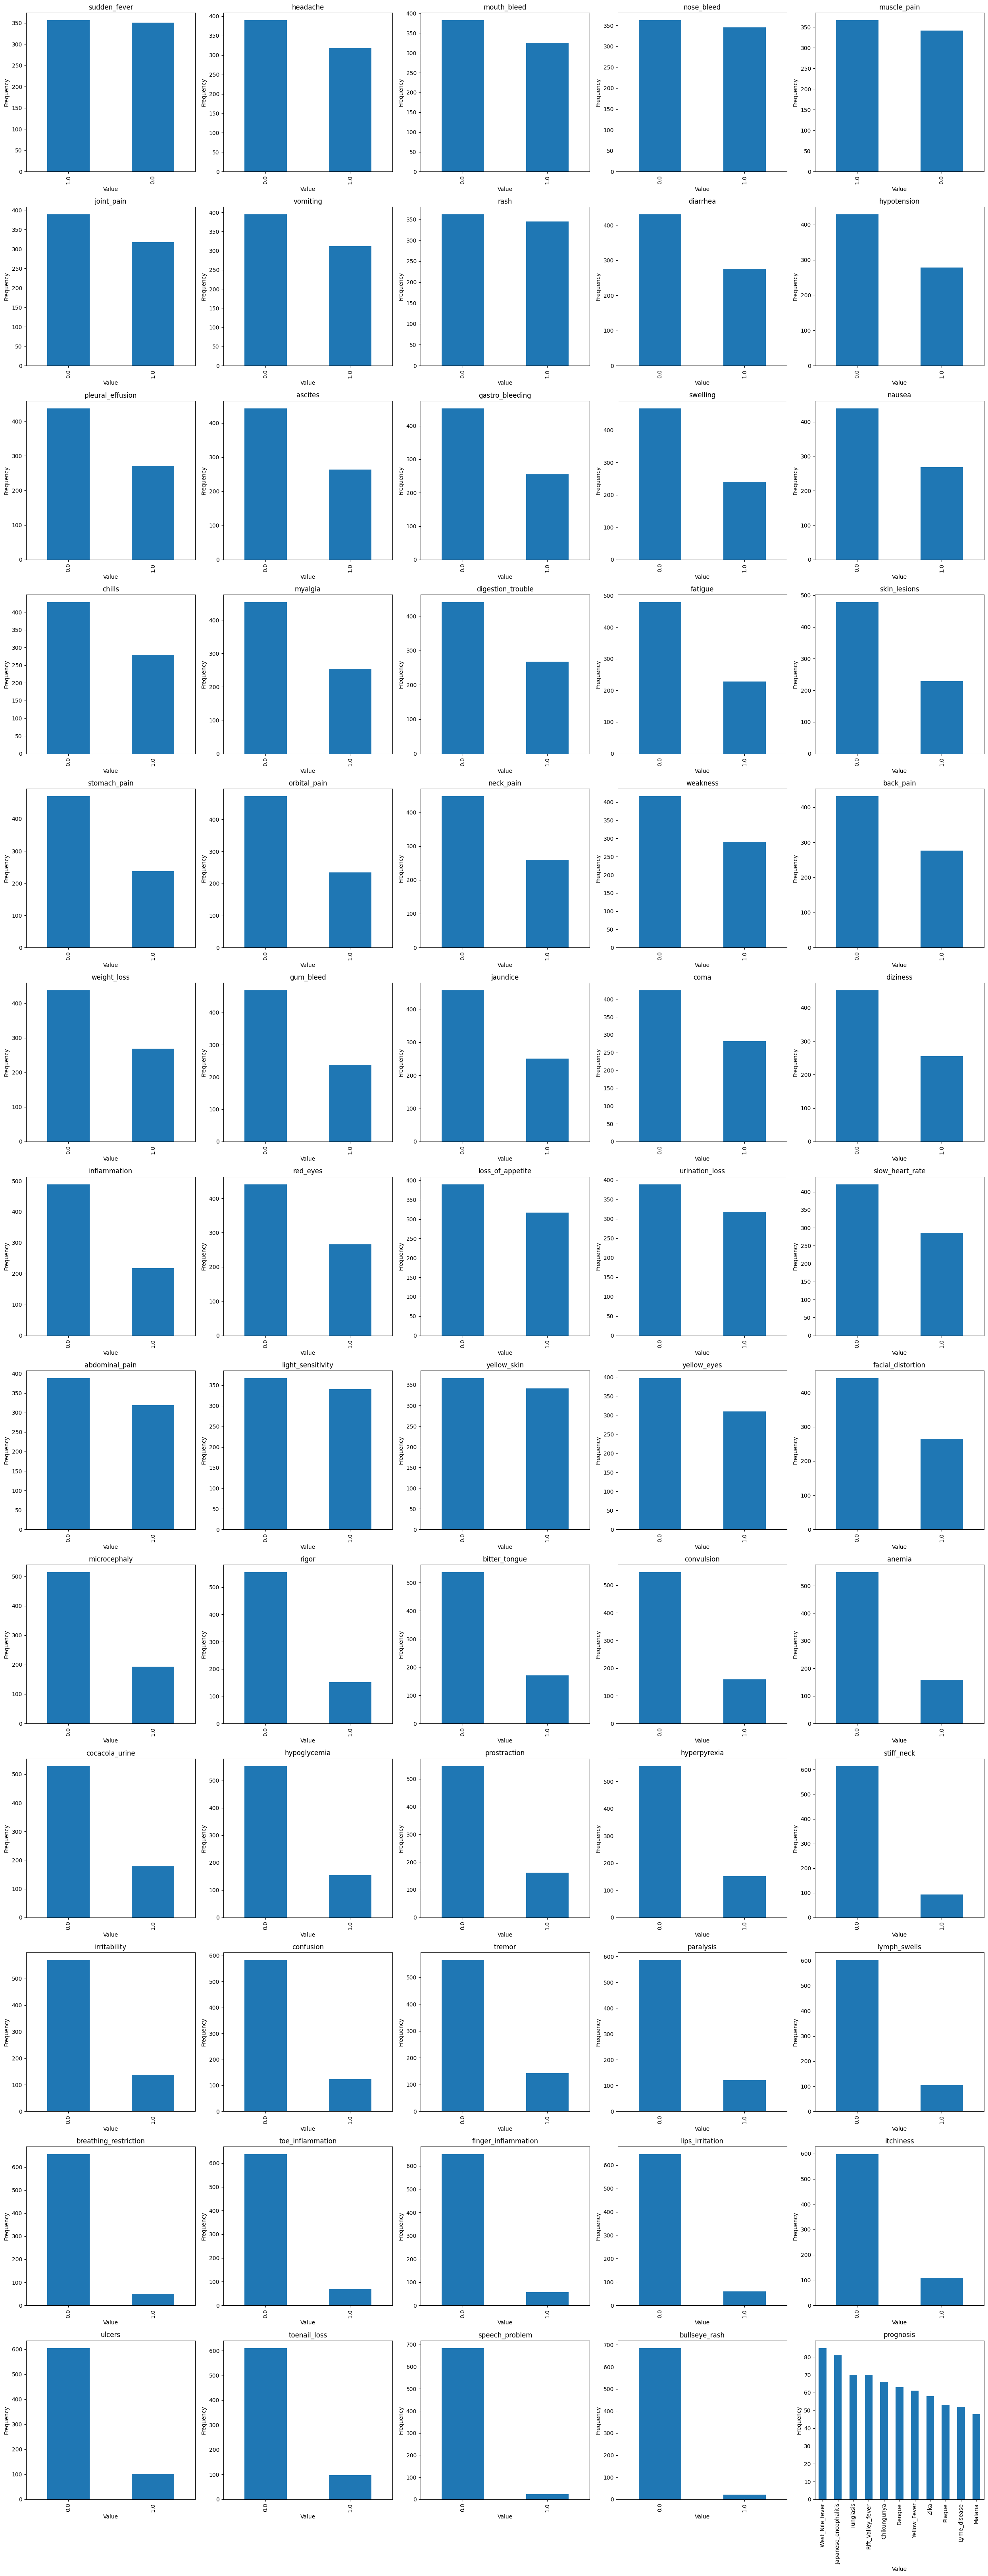

In [22]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the grid
n_cols = 5  # Number of columns in the grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Number of rows, calculated to fit all columns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot the value counts
for i, col in enumerate(df.columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
#basic descriptive statistics
df_new = df.drop(columns=['prognosis'])
df_new.describe()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,0.393211,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,0.488809,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from scipy.stats import zscore
def detect_outliers_zscore(df):
    # Calculate Z-scores
    z_scores = df.select_dtypes(include=['int64', 'float64']).apply(zscore)
    # Identify outliers
    outliers = (z_scores.abs() > 3)
    return outliers


# Detect outliers
outliers_zscore = detect_outliers_zscore(df)

# Identify the rows with outliers
outlier_rows = df[outliers_zscore.any(axis=1)]

# Remove outlier rows
df_cleaned = df.drop(outlier_rows.index)

# Check if outliers were removed
if outlier_rows.empty:
    print("There were no outliers in the dataset.")
else:
    print("Outliers were detected and removed from the dataset.")

# Optionally, you can save the cleaned dataset
# df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Print the number of rows removed
print(f"Number of rows removed: {len(outlier_rows)}")

Outliers were detected and removed from the dataset.
Number of rows removed: 112


In [25]:
#The frequency of each symptom corresponding to the disease
symacd = df.groupby('prognosis').mean()
symacd_sum = symacd.sum().sort_values(ascending = False)
symacd = symacd[symacd_sum.index]
symacd


,muscle_pain,sudden_fever,rash,light_sensitivity,yellow_skin,nose_bleed,abdominal_pain,loss_of_appetite,urination_loss,joint_pain,...,itchiness,ulcers,stiff_neck,toenail_loss,toe_inflammation,lips_irritation,finger_inflammation,breathing_restriction,speech_problem,bullseye_rash
prognosis,,,,,,,,,,,,,,,,,,,,,
Chikungunya,0.590909,0.606061,0.621212,0.060606,0.075758,0.681818,0.060606,0.060606,0.045455,0.575758,...,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dengue,0.476190,0.412698,0.539683,0.174603,0.111111,0.555556,0.190476,0.190476,0.206349,0.539683,...,0.301587,0.301587,0.079365,0.222222,0.095238,0.095238,0.047619,0.015873,0.031746,0.063492
Japanese_encephalitis,0.456790,0.506173,0.419753,0.555556,0.641975,0.419753,0.481481,0.444444,0.469136,0.370370,...,0.098765,0.098765,0.160494,0.074074,0.049383,0.074074,0.049383,0.037037,0.000000,0.000000
Lyme_disease,0.576923,0.750000,0.576923,0.730769,0.750000,0.673077,0.711538,0.692308,0.673077,0.653846,...,0.153846,0.038462,0.365385,0.115385,0.384615,0.384615,0.384615,0.365385,0.173077,0.173077
Malaria,0.562500,0.645833,0.708333,0.687500,0.666667,0.604167,0.729167,0.583333,0.625000,0.708333,...,0.000000,0.000000,0.145833,0.000000,0.083333,0.083333,0.083333,0.083333,0.000000,0.000000
Plague,0.641509,0.509434,0.509434,0.792453,0.773585,0.509434,0.754717,0.716981,0.698113,0.490566,...,0.018868,0.018868,0.150943,0.018868,0.113208,0.113208,0.094340,0.094340,0.037736,0.018868
Rift_Valley_fever,0.414286,0.500000,0.457143,0.371429,0.285714,0.400000,0.242857,0.314286,0.285714,0.428571,...,0.257143,0.257143,0.071429,0.171429,0.114286,0.042857,0.014286,0.028571,0.057143,0.042857
Tungiasis,0.314286,0.228571,0.271429,0.185714,0.257143,0.200000,0.185714,0.257143,0.285714,0.271429,...,0.614286,0.614286,0.042857,0.657143,0.057143,0.042857,0.071429,0.071429,0.028571,0.014286
West_Nile_fever,0.635294,0.505882,0.411765,0.541176,0.529412,0.635294,0.447059,0.411765,0.458824,0.341176,...,0.105882,0.105882,0.235294,0.117647,0.141176,0.094118,0.117647,0.105882,0.023529,0.023529


Text(0, 0.5, 'Sum')

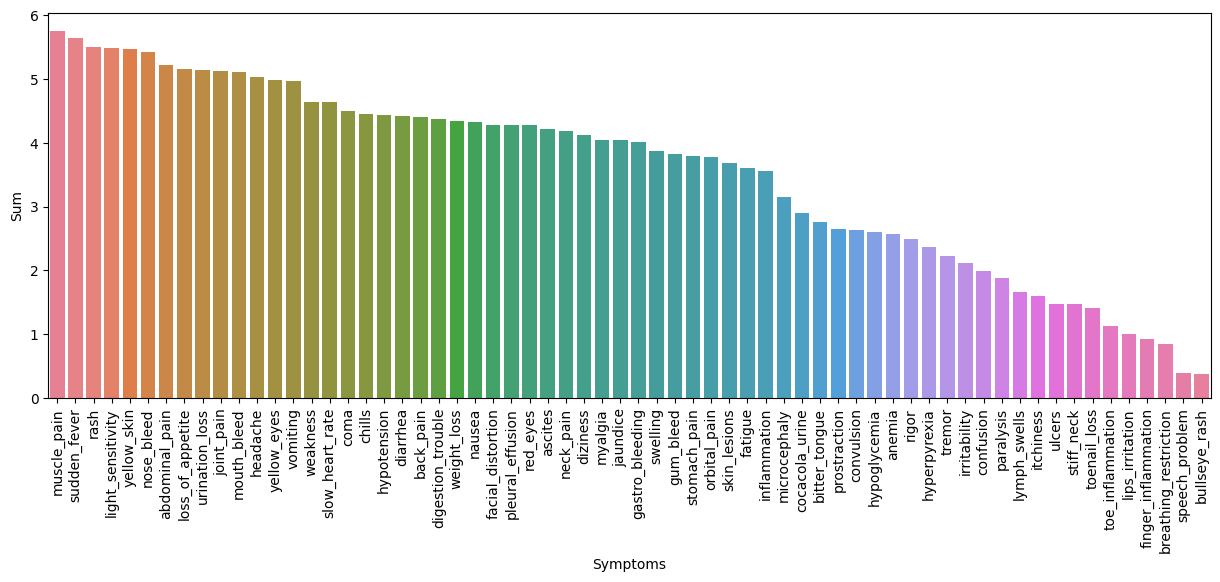

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=symacd_sum.index, y=symacd_sum.values, ax=ax,hue=symacd_sum.index)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_xlabel('Symptoms')
ax.set_ylabel('Sum')

In [27]:
#Low rank of assocition might tell us about the rarity of a symptom
#which would help in diagnosis

print(f'------ 5 lowest rank of association ------')
lowest_rank = symacd_sum.sort_values()[:5].index.tolist()
for i in lowest_rank: print("           ",i)

------ 5 lowest rank of association ------
            bullseye_rash
            speech_problem
            breathing_restriction
            finger_inflammation
            lips_irritation


<Axes: ylabel='prognosis'>

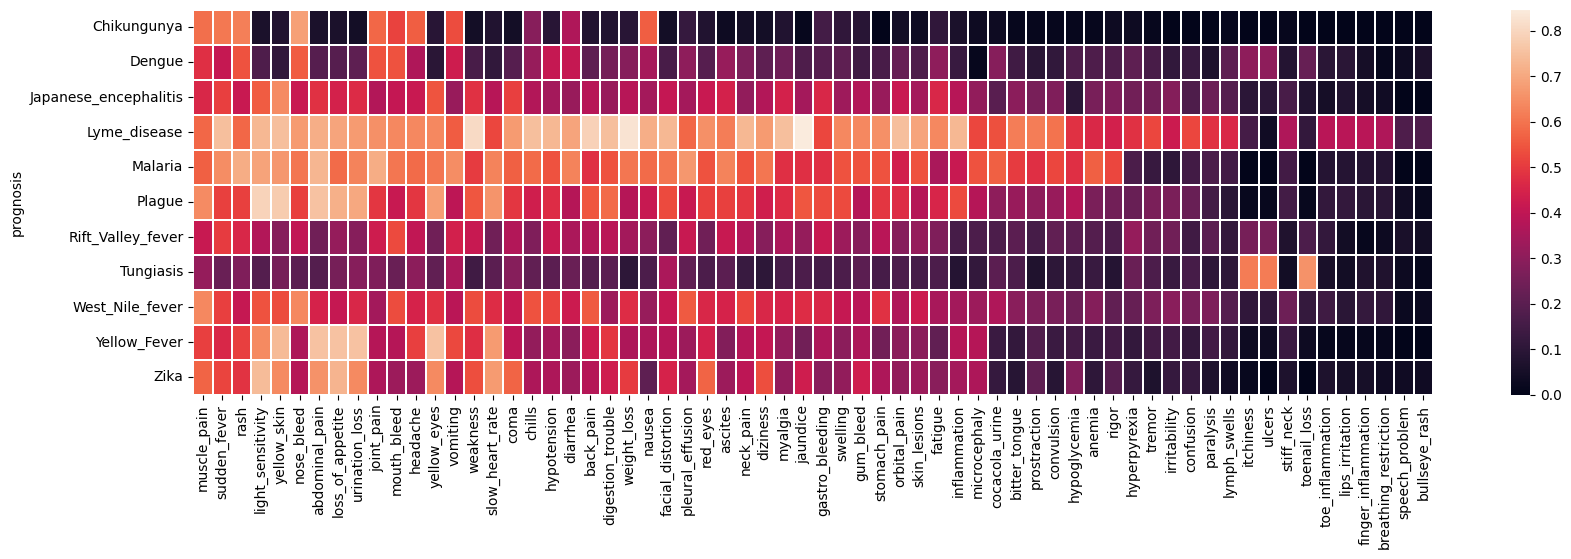

In [28]:
#Heat Map To Check Symtoms Asscociation Similarity
#The frequency of each symptop corresponding to the disease
symacd = df.groupby('prognosis').mean()
symacd_sum = symacd.sum().sort_values(ascending = False)
symacd = symacd[symacd_sum.index]
fig,ax = plt.subplots(figsize = (20,5))
sns.heatmap(symacd,\
            linewidths = 0.005,ax = ax)

In [29]:
X_train = df_cleaned.drop('prognosis', axis=1)
y_train = df_cleaned['prognosis']

In [30]:
# test data
dft = pd.read_csv('/content/test.csv')
dft.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
dft.drop(columns=['id'], inplace=True)
dft.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#one more attempt at making knn model

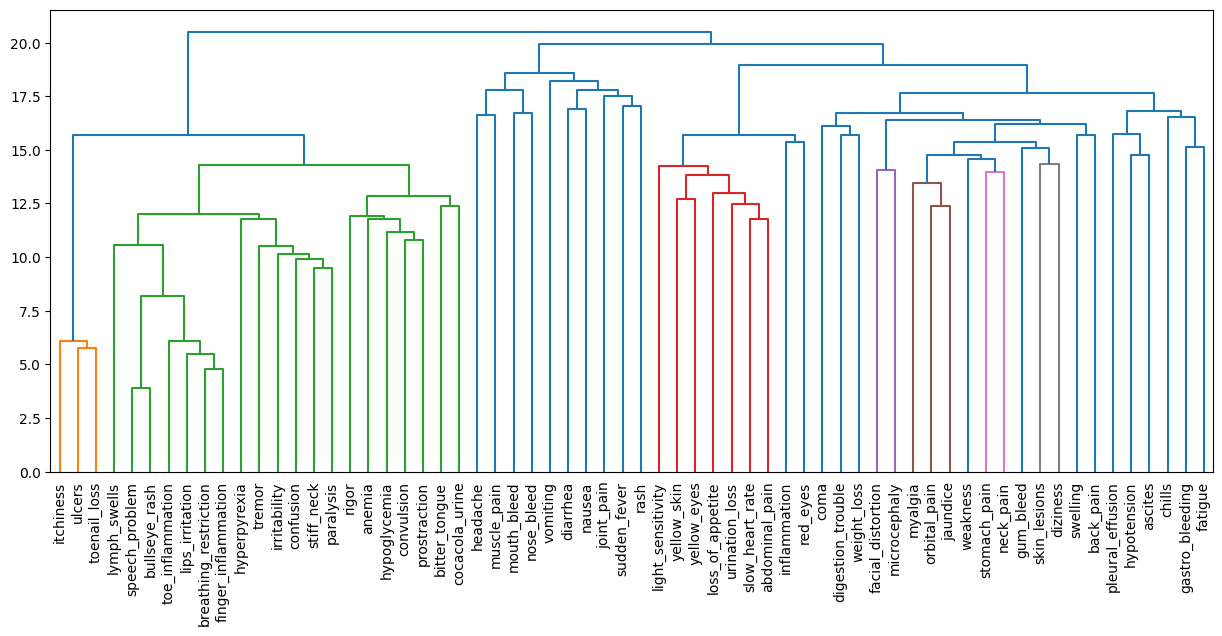

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
ft = df.drop(columns = 'prognosis').T
ft_labels = df.columns.to_list()[:-1]
linkage_mtx = linkage(pdist(ft), method='complete')
fi, ax = plt.subplots(figsize=(15,6))
p = dendrogram(linkage_mtx, labels = ft_labels)
ax.tick_params(axis='x', labelsize = 10)
plt.show()

In [33]:
cluster = {}
for k,v in zip(p['leaves_color_list'],p['ivl']):
    if k not in cluster:
        cluster[k] = [v]
    else:
        cluster[k].append(v)
cluster

{'C1': ['itchiness', 'ulcers', 'toenail_loss'],
 'C2': ['lymph_swells',
  'speech_problem',
  'bullseye_rash',
  'toe_inflammation',
  'lips_irritation',
  'breathing_restriction',
  'finger_inflammation',
  'hyperpyrexia',
  'tremor',
  'irritability',
  'confusion',
  'stiff_neck',
  'paralysis',
  'rigor',
  'anemia',
  'hypoglycemia',
  'convulsion',
  'prostraction',
  'bitter_tongue',
  'cocacola_urine'],
 'C0': ['headache',
  'muscle_pain',
  'mouth_bleed',
  'nose_bleed',
  'vomiting',
  'diarrhea',
  'nausea',
  'joint_pain',
  'sudden_fever',
  'rash',
  'inflammation',
  'red_eyes',
  'coma',
  'digestion_trouble',
  'weight_loss',
  'weakness',
  'gum_bleed',
  'swelling',
  'back_pain',
  'pleural_effusion',
  'hypotension',
  'ascites',
  'chills',
  'gastro_bleeding',
  'fatigue'],
 'C3': ['light_sensitivity',
  'yellow_skin',
  'yellow_eyes',
  'loss_of_appetite',
  'urination_loss',
  'slow_heart_rate',
  'abdominal_pain'],
 'C4': ['facial_distortion', 'microcephaly'],

In [34]:
from sklearn.manifold import TSNE

class DataAug:
    def __init__(self, features, target=None):
        self.features = features
        self.target = target
        self.result_df = dict()

    def get_aug(self, comp):
        # self.tsne(comp)
        self.asso_score()
        self.clustering()
        aug_df = pd.concat(
            [x for x in self.result_df.values()], axis=1
        )
        aug_df = pd.concat([self.features, self.target, aug_df], axis=1)
        return aug_df

    def tsne(self, comp):
        col_comp = [f't{x}' for x in range(comp)]
        comp = TSNE(n_components=comp, random_state=0, method='exact')
        embedd = comp.fit_transform(self.features)
        self.result_df['tsne'] = pd.DataFrame(embedd, columns=col_comp, index=self.features.index)

    def asso_score(self):
        asso_score = list()
        for i, r in enumerate(self.features.iterrows()):
            s = sum(r[1].tolist())
            asso_score.append(s)
        asso_score = pd.DataFrame(np.array(asso_score), columns=['asso_score'])
        self.result_df['asso_score'] = asso_score

    def clustering(self):
        clust_df = {}
        clust_dict = {
            'C1': ['itchiness', 'ulcers', 'toenail_loss'],
            'C2': [
                'lymph_swells', 'speech_problem', 'bullseye_rash', 'toe_inflammation', 'lips_irritation',
                'breathing_restriction', 'finger_inflammation', 'hyperpyrexia', 'tremor', 'irritability',
                'confusion', 'stiff_neck', 'paralysis', 'rigor', 'anemia', 'hypoglycemia', 'convulsion',
                'prostraction', 'bitter_tongue', 'cocacola_urine'
            ],
            'C0': [
                'headache', 'muscle_pain', 'mouth_bleed', 'nose_bleed', 'vomiting', 'diarrhea', 'nausea',
                'joint_pain', 'sudden_fever', 'rash', 'inflammation', 'red_eyes', 'coma', 'digestion_trouble',
                'weight_loss', 'weakness', 'gum_bleed', 'swelling', 'back_pain', 'pleural_effusion', 'hypotension',
                'ascites', 'chills', 'gastro_bleeding', 'fatigue'
            ],
            'C3': [
                'light_sensitivity', 'yellow_skin', 'yellow_eyes', 'loss_of_appetite', 'urination_loss',
                'slow_heart_rate', 'abdominal_pain'
            ],
            'C4': ['facial_distortion', 'microcephaly'],
            'C5': ['myalgia', 'orbital_pain', 'jaundice'],
            'C6': ['stomach_pain', 'neck_pain'],
            'C7': ['skin_lesions'],
                          'lyme_col':['jaundice', 'weight_loss', 'weakness', 'back_pain', 'sudden_fever', 'myalgia', 'chills', 'orbital_pain', 'digestion_trouble'],
                        'pain_clust' : self.features.columns[self.features.columns.str.contains('pain')],
                        'inflammation_clust' : self.features.columns[self.features.columns.str.contains('inflammation')],
                        'bleeding_clust' : self.features.columns[self.features.columns.str.contains('bleed')],
                        'skin_clust' : self.features.columns[self.features.columns.str.contains('bleed')].tolist() + ['itchiness'],
                     }
        for k , v in clust_dict.items():
            clust_df[k] = self.features[v].sum(axis = 1)
        self.result_df['cluster'] = pd.DataFrame(clust_df)

In [35]:
train_aug = DataAug(df.drop(columns='prognosis'), df['prognosis'])
train_df_aug = train_aug.get_aug(2)

In [36]:
test_aug = DataAug(dft)
test_df_aug = test_aug.get_aug(2)

In [37]:
train_df_aug

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,C3,C4,C5,C6,C7,lyme_col,pain_clust,inflammation_clust,bleeding_clust,skin_clust
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,6.0,5.0,0.0,2.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,1.0,7.0,6.0,3.0,4.0,5.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,3.0,1.0,2.0,1.0,1.0,5.0,4.0,1.0,3.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,2.0,1.0,0.0,0.0,4.0,3.0,1.0,3.0,3.0
703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,7.0,2.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0
704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,6.0,2.0,2.0,0.0,0.0,6.0,2.0,0.0,1.0,1.0
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,5.0,1.0,2.0,2.0,1.0,8.0,5.0,2.0,1.0,1.0


<Axes: xlabel='t0', ylabel='t1'>

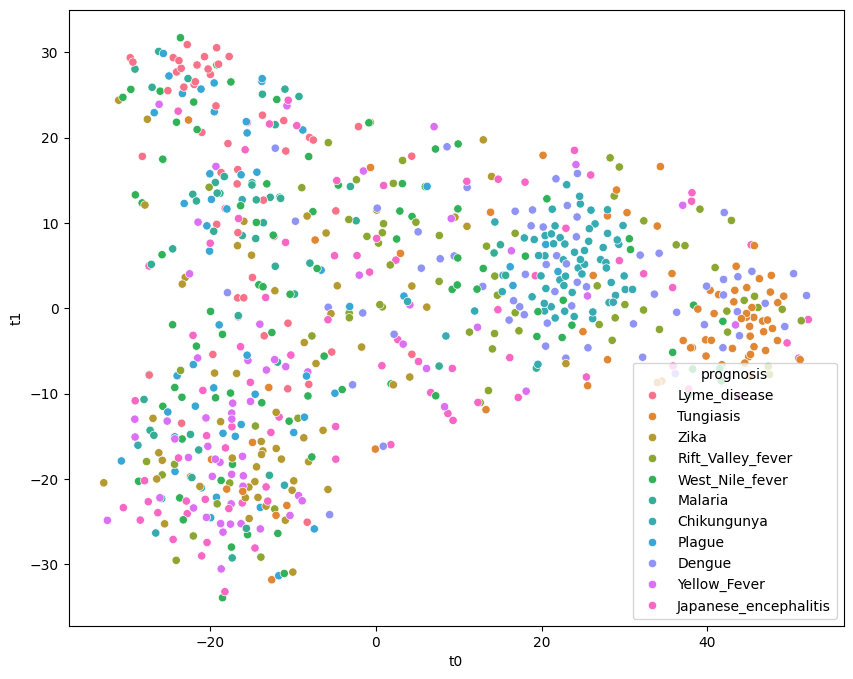

In [38]:
tsne_plot = DataAug(df.drop(columns = 'prognosis'), df['prognosis'])
tsne_plot.tsne(2)
fig, ax = plt.subplots(figsize = (10,8))
embedd = pd.concat([df['prognosis'], tsne_plot.result_df['tsne']], axis = 1)
sns.scatterplot(embedd, x = 't0', y='t1', hue = 'prognosis', ax = ax)

<Axes: xlabel='asso_score', ylabel='Density'>

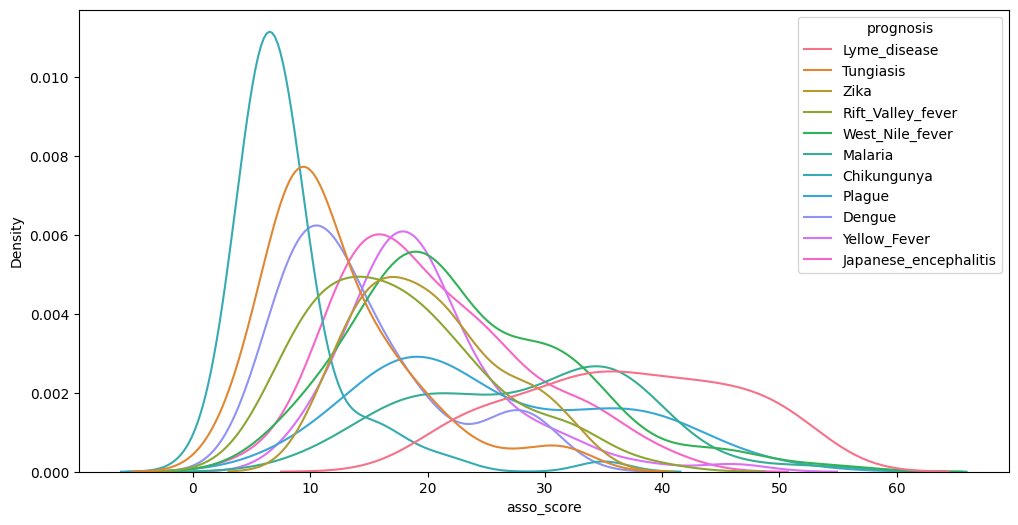

In [39]:
tsne_plot = DataAug(df.drop(columns = 'prognosis'),df['prognosis'])
tsne_plot.asso_score()
fig,ax = plt.subplots(figsize = (12,6))
asso = pd.concat([df['prognosis'],tsne_plot.result_df['asso_score']],axis = 1)
sns.kdeplot(asso,x = 'asso_score',hue = 'prognosis')

In [40]:
train_df_aug = train_df_aug.sample(frac = 1, random_state = 1995).reset_index(drop=True)


In [41]:
le = LabelEncoder()
features = train_df_aug.drop(columns = 'prognosis')
target = le.fit_transform(train_df_aug['prognosis'])

In [42]:
seed = 42
splits = 5
k = StratifiedKFold(n_splits = splits, random_state = seed, shuffle = True)
np.random.seed(seed)


In [43]:
def apk(actual, predicted, k=10):

    if not len(actual):
        return 0.0

    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):

    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [44]:
def cross_val_score(model, cv = k, label = '', data = df):

    X = data.copy()
    y = X.pop('prognosis')

    #transforming prognosis
    y = [prognosis.replace(' ', '_') for prognosis in y]
    y = le.transform(y)

    #initiate prediction arrays and score lists
    val_predictions = np.zeros((len(data), 11))
    train_predictions = np.zeros((len(data), 11))
    train_logloss, val_logloss = [], []
    train_map3, val_map3 = [], []

    #training model, predicting prognosis probability, and evaluating log loss
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):

        model.fit(X.iloc[train_idx], y[train_idx])

        train_preds = model.predict_proba(X.iloc[train_idx])
        val_preds = model.predict_proba(X.iloc[val_idx])

        train_predictions[train_idx] += train_preds
        val_predictions[val_idx] += val_preds

        train_score = log_loss(y[train_idx], train_preds)
        val_score = log_loss(y[val_idx], val_preds)

        train_logloss.append(train_score)
        val_logloss.append(val_score)

        #select three most probable prognosis based on train dataset prediction
        train_index = np.argsort(-train_preds)[:,:3] #return index of three most probable prognosis

        #select three most probable prognosis based on validation dataset prediction
        val_index = np.argsort(-val_preds)[:,:3]

        #calculate map@3
        train_score = mapk(y[train_idx].reshape(-1, 1), train_index, 3)
        val_score = mapk(y[val_idx].reshape(-1, 1), val_index, 3)

        train_map3.append(train_score)
        val_map3.append(val_score)

    print(f'Val log_loss   : {np.mean(val_logloss):.5f} ± {np.std(val_logloss):.5f} | Train log_loss   : {np.mean(train_logloss):.5f} ± {np.std(train_logloss):.5f} | {label}')
    print(f'Val MAP@3 Score: {np.mean(val_map3):.5f} ± {np.std(val_map3):.5f} | Train MAP@3 Score: {np.mean(train_map3):.5f} ± {np.std(train_map3):.5f} | {label}\n')

    return val_logloss, val_map3

In [45]:
logloss_list, map3_list = pd.DataFrame(), pd.DataFrame()

models = [
    ('log', LogisticRegression(random_state = seed, max_iter = 10000)),
    ('svc', SVC(random_state = seed, probability = True)),
    ('lda', LinearDiscriminantAnalysis()),
    ('gauss', GaussianProcessClassifier(random_state = seed)),
    ('et', ExtraTreesClassifier(random_state = seed)),
    ('rf', RandomForestClassifier(random_state = seed)),
    ('gb', GradientBoostingClassifier(random_state = seed)),
    ('hgb', HistGradientBoostingClassifier(random_state = seed)),
    ('ada', AdaBoostClassifier(random_state = seed)),
    ('knn', KNeighborsClassifier())
]

for (label, model) in models:
    (logloss_list[label], map3_list[label]) = cross_val_score(model, label = label)

Val log_loss   : 2.28799 ± 0.08526 | Train log_loss   : 1.24598 ± 0.01694 | log
Val MAP@3 Score: 0.41503 ± 0.03258 | Train MAP@3 Score: 0.70344 ± 0.00567 | log

Val log_loss   : 1.86038 ± 0.03747 | Train log_loss   : 1.26779 ± 0.01631 | svc
Val MAP@3 Score: 0.44950 ± 0.02327 | Train MAP@3 Score: 0.83387 ± 0.02303 | svc

Val log_loss   : 2.77131 ± 0.07160 | Train log_loss   : 1.48518 ± 0.02477 | lda
Val MAP@3 Score: 0.42046 ± 0.03477 | Train MAP@3 Score: 0.64969 ± 0.00375 | lda

Val log_loss   : 2.34453 ± 0.00734 | Train log_loss   : 2.04186 ± 0.00315 | gauss
Val MAP@3 Score: 0.39700 ± 0.00965 | Train MAP@3 Score: 0.99140 ± 0.00132 | gauss

Val log_loss   : 2.59651 ± 0.26390 | Train log_loss   : 0.00000 ± 0.00000 | et
Val MAP@3 Score: 0.43117 ± 0.01274 | Train MAP@3 Score: 1.00000 ± 0.00000 | et

Val log_loss   : 2.13831 ± 0.16800 | Train log_loss   : 0.34998 ± 0.00106 | rf
Val MAP@3 Score: 0.43048 ± 0.01068 | Train MAP@3 Score: 1.00000 ± 0.00000 | rf

Val log_loss   : 2.28166 ± 0.05412

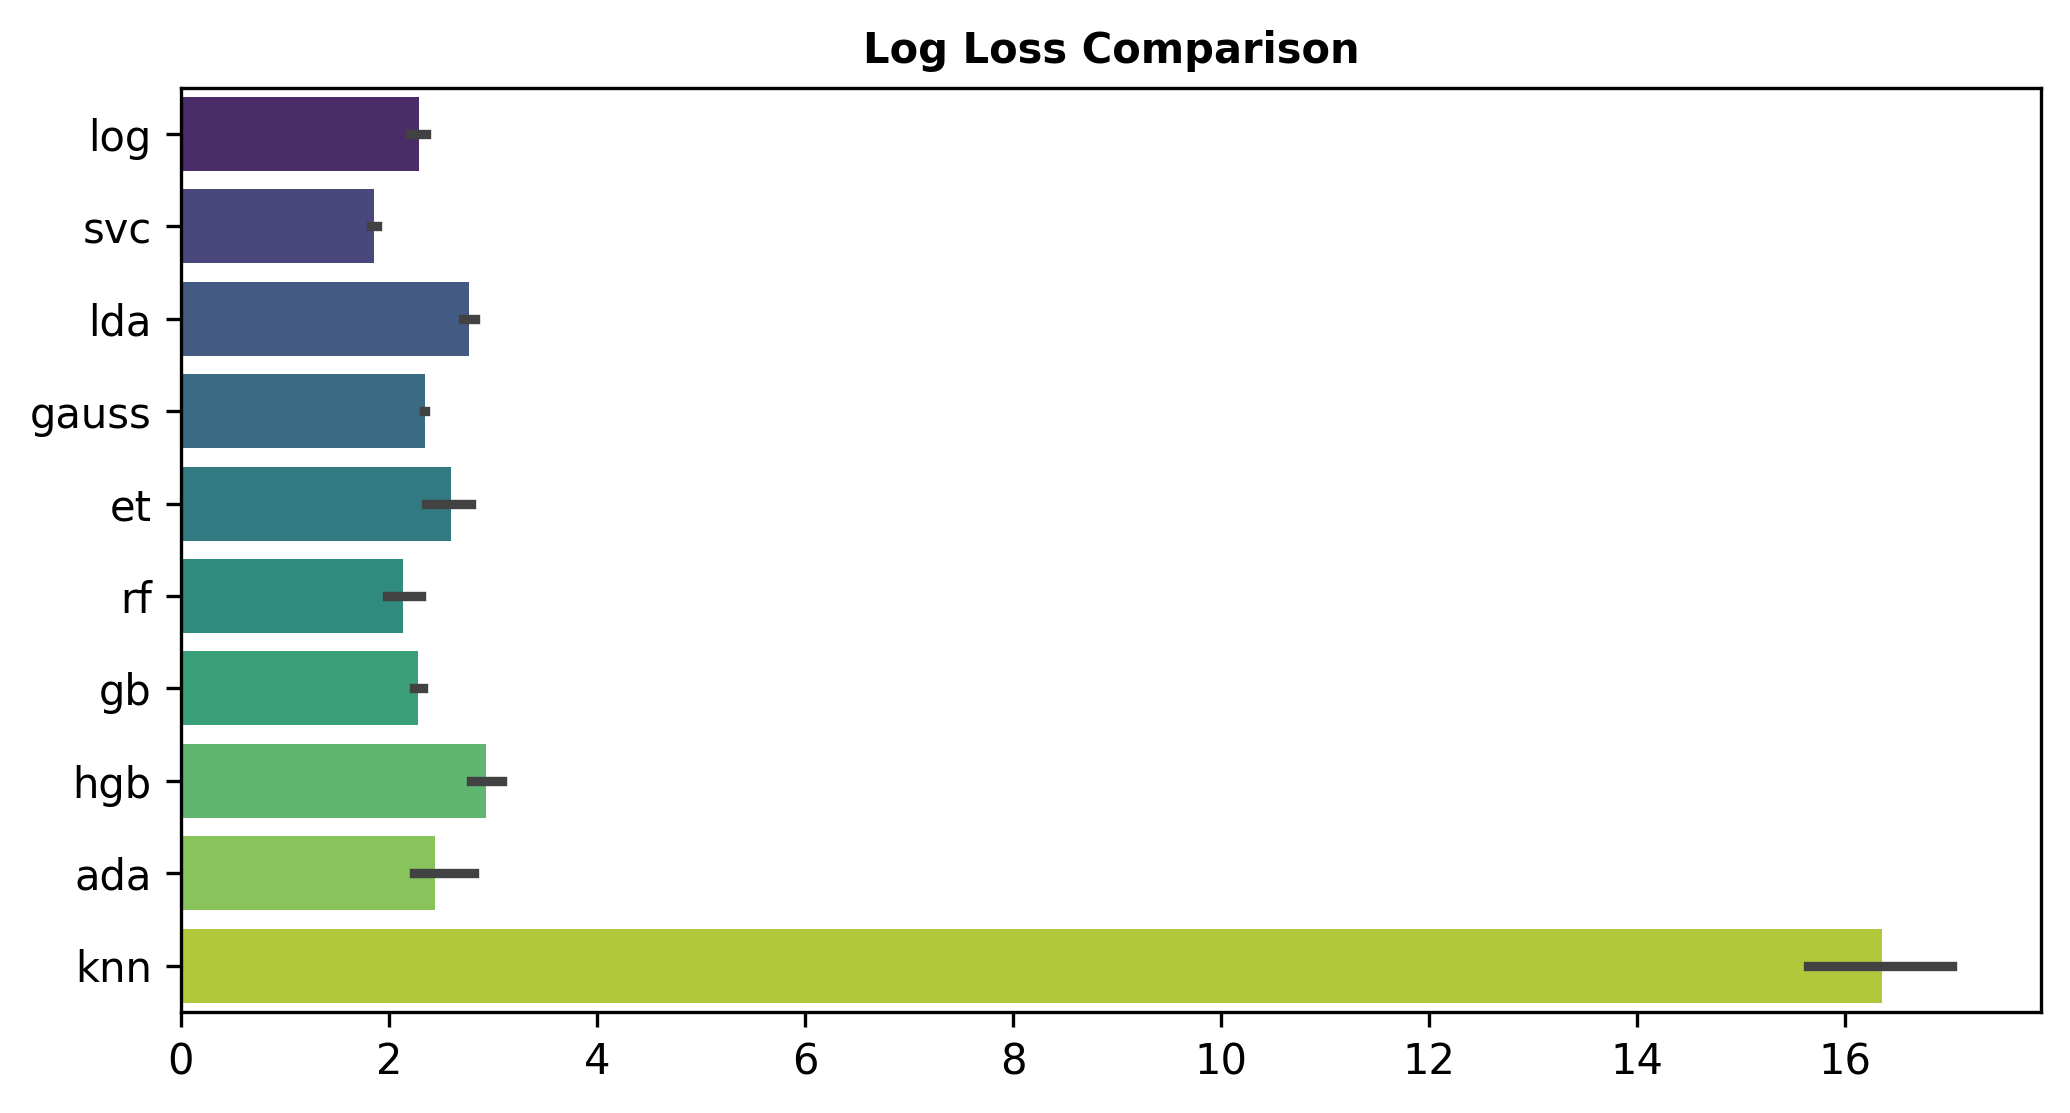

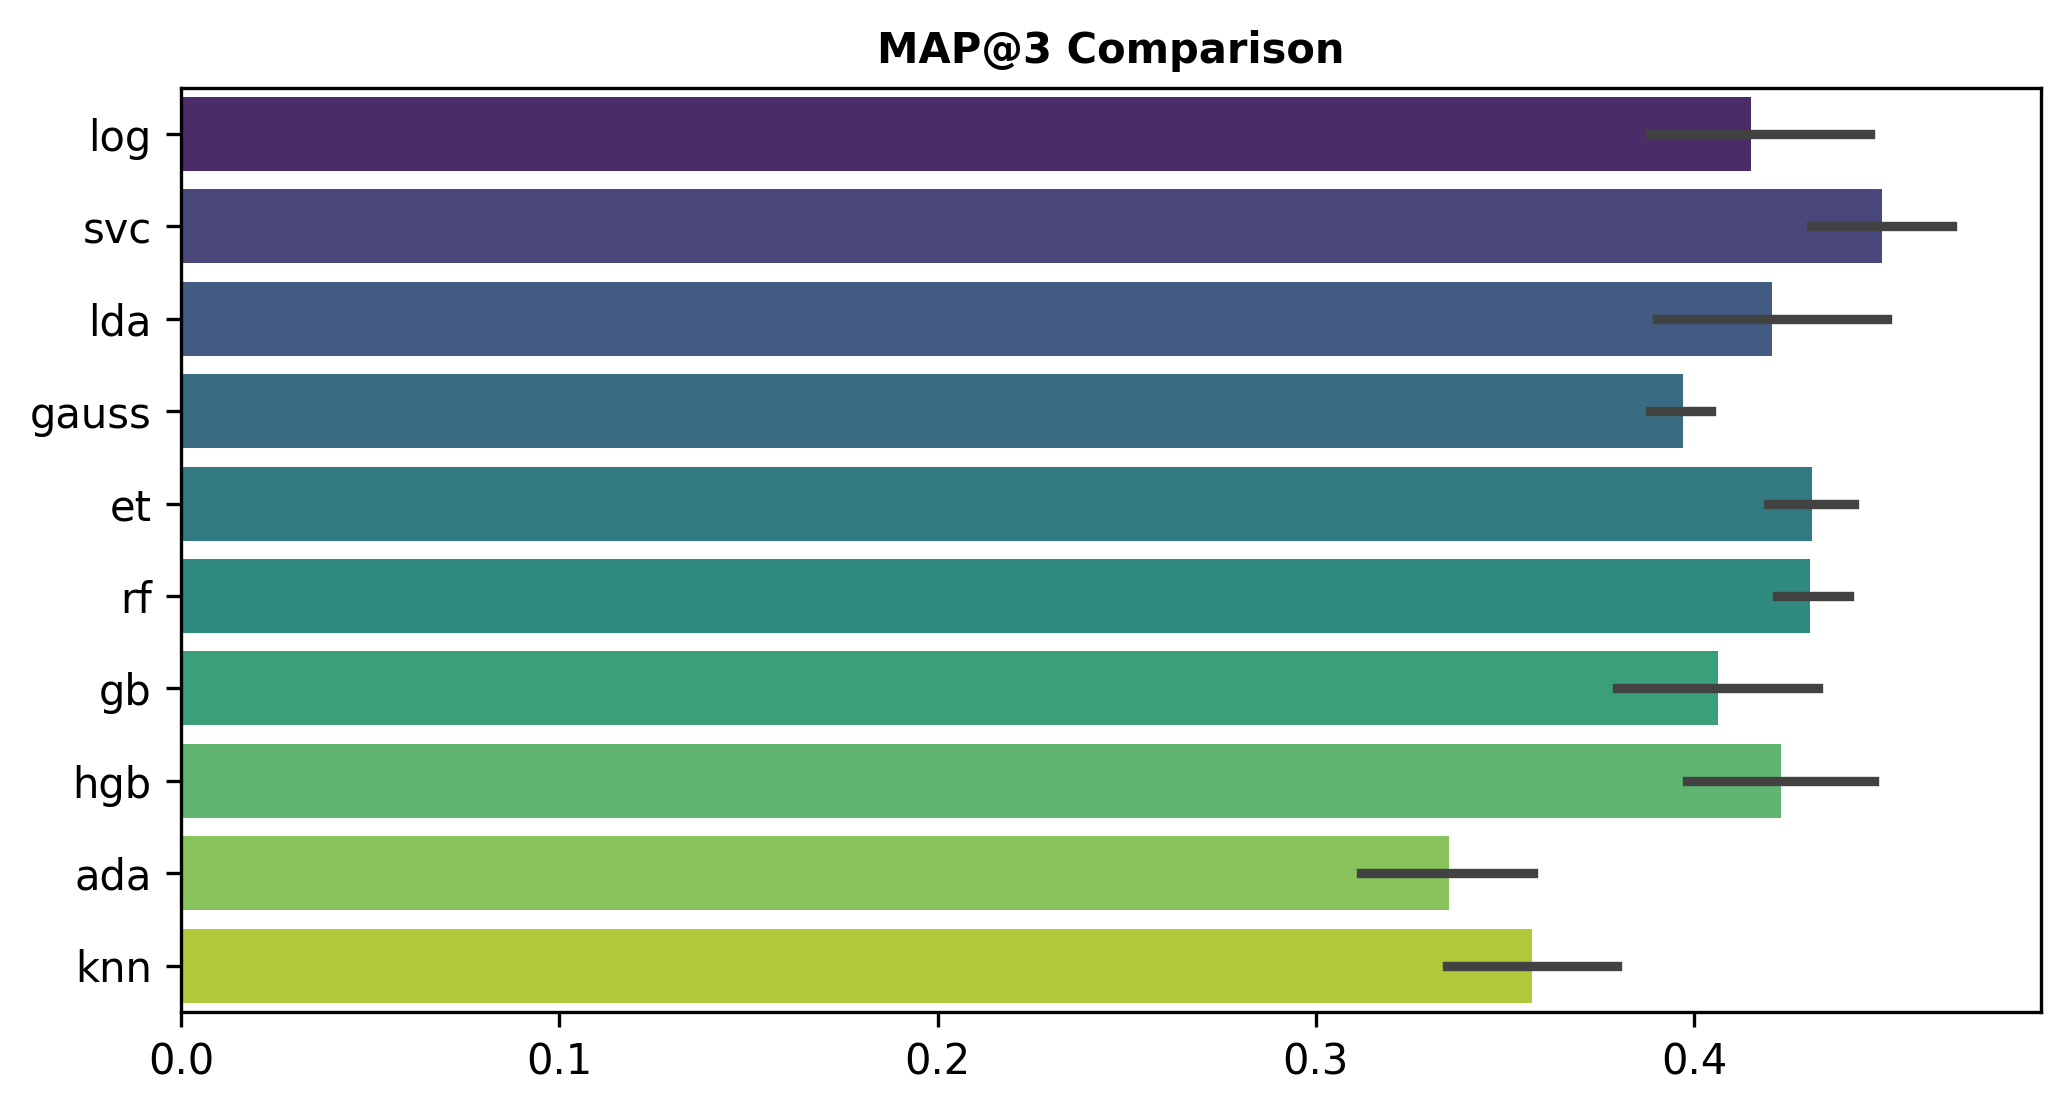

In [46]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = logloss_list, palette = 'viridis', orient = 'h')
plt.title('Log Loss Comparison', weight = 'bold', size = 10)
plt.show()

plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = map3_list, palette = 'viridis', orient = 'h')
plt.title('MAP@3 Comparison', weight = 'bold', size = 10)
plt.show()

In [47]:
class FE1(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, x, y = None):
        return self

    def transform(self, x, y = None):

        transformed = x.copy()

        similar_columns = ['loss_of_appetite', 'urination_loss', 'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin', 'yellow_eyes']
        transformed['similar_cluster'] = transformed[similar_columns].sum(axis=1)

        lyme_columns = ['jaundice', 'weight_loss', 'weakness', 'back_pain', 'sudden_fever', 'myalgia', 'chills', 'orbital_pain', 'digestion_trouble']
        transformed['lyme_cluster'] = transformed[lyme_columns].sum(axis=1)

        tungiasis_columns = ['ulcers', 'toenail_loss', 'itchiness']
        transformed['tungiasis_cluster'] = transformed[tungiasis_columns].sum(axis=1)

        chikungunya_columns = ['convulsion', 'finger_inflammation', 'speech_problem', 'toenail_loss', 'ulcers', 'itchiness', 'lips_irritation', 'breathing_restriction', 'toe_inflammation', 'paralysis', 'stomach_pain', 'confusion', 'irritability', 'bullseye_rash']
        transformed['chikungunya_cluster'] = transformed[chikungunya_columns].sum(axis=1)

        return transformed

In [48]:
KNNModel = Pipeline([
    ('fe', FE1()),
    ('select', SelectFromModel(estimator = LogisticRegression(penalty = 'l1', solver = 'saga', random_state = seed, max_iter = 10000000, n_jobs = -1))),
    ('pca', PCA(7, random_state = seed)),
    ('model', KNeighborsClassifier(55, n_jobs = -1))
])

_ = cross_val_score(
    KNNModel,
    label = 'K-Nearest Neighbors'
)

Val log_loss   : 2.30111 ± 0.14417 | Train log_loss   : 1.81830 ± 0.01309 | K-Nearest Neighbors
Val MAP@3 Score: 0.44454 ± 0.02874 | Train MAP@3 Score: 0.48156 ± 0.00572 | K-Nearest Neighbors



In [49]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 654.1 kB/s eta 0:00:00


***STREAMLIT APP***

In [51]:
import joblib
joblib.dump(KNNModel, 'knn_model.pkl')

['knn_model.pkl']

In [52]:

import random

# Generate random input
random_index = random.randint(0, len(test_df_aug) - 1)
random_input = df.iloc[[random_index]].drop('prognosis', axis=1)  # Assuming 'prognosis' is the target column

# Make prediction
prediction = KNNModel.predict(random_input)

# Assuming 'le' is your LabelEncoder from before
predicted_disease = le.inverse_transform(prediction)[0]

print(f"For random input at index {random_index}, the predicted disease is: {predicted_disease}")


For random input at index 129, the predicted disease is: Chikungunya
